In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.to_csv('breast_cancer.csv', index=False)  
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
# Step 1: Import libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 2: Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Number of features:", X.shape[1])
print("Number of samples:", X.shape[0])

# Step 3: Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data prepared successfully.")

Number of features: 30
Number of samples: 569
Data prepared successfully.


In [10]:
import time
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Common learning rate
learning_rate = 0.01

results_case1 = {}

# ---- Case 1a: Neurons > 100 ----
start_time = time.time()
mlp_256 = MLPClassifier(hidden_layer_sizes=(256,), learning_rate_init=learning_rate, 
                        max_iter=100, random_state=42)
mlp_256.fit(X_train, y_train)
y_pred_256 = mlp_256.predict(X_test)
time_taken_256 = time.time() - start_time

results_case1['256_neurons'] = {
    'accuracy': accuracy_score(y_test, y_pred_256),
    'time': time_taken_256,
    'report': classification_report(y_test, y_pred_256)
}

# ---- Case 1b: Neurons < 50 ----
start_time = time.time()
mlp_10 = MLPClassifier(hidden_layer_sizes=(10,), learning_rate_init=learning_rate, 
                       max_iter=100, random_state=42)
mlp_10.fit(X_train, y_train)
y_pred_10 = mlp_10.predict(X_test)
time_taken_10 = time.time() - start_time

results_case1['10_neurons'] = {
    'accuracy': accuracy_score(y_test, y_pred_10),
    'time': time_taken_10,
    'report': classification_report(y_test, y_pred_10)
}

# ---- Display Results ----
for case, metrics in results_case1.items():
    print(f"\n--- {case} ---")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Time taken: {metrics['time']:.4f} seconds")
    print("Classification Report:\n", metrics['report'])


--- 256_neurons ---
Accuracy: 0.9561
Time taken: 0.2466 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94        42
           1       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


--- 10_neurons ---
Accuracy: 0.9649
Time taken: 0.1124 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
results_case2 = {}
neurons_fixed = 32

# ---- Case 2a: learning rate = 0.01 ----
start_time = time.time()
mlp_lr_001 = MLPClassifier(hidden_layer_sizes=(neurons_fixed,), learning_rate_init=0.01,
                           max_iter=50, random_state=42)
mlp_lr_001.fit(X_train, y_train)
y_pred_lr_001 = mlp_lr_001.predict(X_test)
time_taken_lr_001 = time.time() - start_time

results_case2['lr_0.01'] = {
    'accuracy': accuracy_score(y_test, y_pred_lr_001),
    'time': time_taken_lr_001,
    'report': classification_report(y_test, y_pred_lr_001)
}

# ---- Case 2b: learning rate = 0.1 ----
start_time = time.time()
mlp_lr_01 = MLPClassifier(hidden_layer_sizes=(neurons_fixed,), learning_rate_init=0.1,
                          max_iter=50, random_state=42)
mlp_lr_01.fit(X_train, y_train)
y_pred_lr_01 = mlp_lr_01.predict(X_test)
time_taken_lr_01 = time.time() - start_time

results_case2['lr_0.1'] = {
    'accuracy': accuracy_score(y_test, y_pred_lr_01),
    'time': time_taken_lr_01,
    'report': classification_report(y_test, y_pred_lr_01)
}

# ---- Display Results ----
for case, metrics in results_case2.items():
    print(f"\n--- {case} ---")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Time taken: {metrics['time']:.4f} seconds")
    print("Classification Report:\n", metrics['report'])


--- lr_0.01 ---
Accuracy: 0.9561
Time taken: 0.0736 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94        42
           1       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


--- lr_0.1 ---
Accuracy: 0.9474
Time taken: 0.0539 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        42
           1       0.99      0.93      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


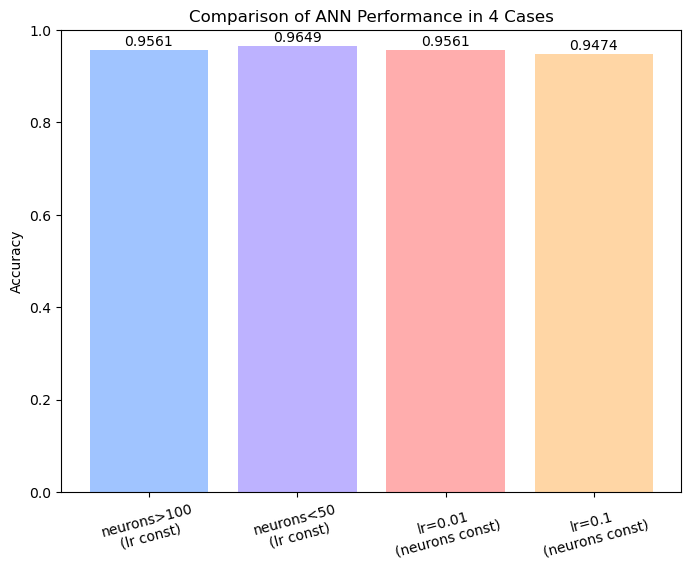

In [20]:
import matplotlib.pyplot as plt

accuracies = [
    0.9561,  # neurons > 100 (lr const)
    0.9649,  # neurons < 50 (lr const)
    0.9561,  # lr = 0.01 (neurons const)
    0.9474   # lr = 0.1 (neurons const)
]

labels = [
    'neurons>100\n(lr const)',
    'neurons<50\n(lr const)',
    'lr=0.01\n(neurons const)',
    'lr=0.1\n(neurons const)'
]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, accuracies, color=['#A0C4FF', '#BDB2FF', '#FFADAD', '#FFD6A5'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Comparison of ANN Performance in 4 Cases')
plt.xticks(rotation=15)

# Add accuracy values on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{acc:.4f}", ha='center', fontsize=10)

plt.show()